# Strategy on SP500

In [1]:
from Utils import Strategy, Analytics
import copy

In [2]:
start_date = '2010-01-01'
end_date = '2024-01-01'
portfolio_value = 1000000
index = 'SP500'

In [3]:
filter_paths = ['annual_3_tier_filter.txt', 'biannual_2_tier_filter.txt', 'biannual_3_tier_filter.txt','monthly_filter.txt', 'quarterly_filter.txt', 'annual_filter.txt']
filter_paths = ['filters/' + path for path in filter_paths]
monthly_filter_ids = [0, 2, 3, 4, 5]
quarterly_filter_ids = [0, 1, 4, 5]
monthly_strategy = Strategy(portfolio_value, index, start_date, end_date, resampling = 'M', risk_free_rate = 0.02, trading_fees = 0.25)
quarterly_strategy = Strategy(portfolio_value, index, start_date, end_date, resampling = 'Q', risk_free_rate = 0.02, trading_fees = 0.25)

[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2024-01-01)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2024-01-01)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [4]:
monthly_rebalanced_strategies = [copy.deepcopy(monthly_strategy) for i in monthly_filter_ids]
quarterly_rebalanced_strategies = [copy.deepcopy(quarterly_strategy) for i in quarterly_filter_ids]

In [5]:
for i, strategy in enumerate(monthly_rebalanced_strategies):
    strategy.initialise(filter_paths[monthly_filter_ids[i]])
for i, strategy in enumerate(quarterly_rebalanced_strategies):
    strategy.initialise(filter_paths[quarterly_filter_ids[i]])

In [6]:
for i, strategy in enumerate(monthly_rebalanced_strategies):
    print(strategy.filter_dict)
for i, strategy in enumerate(quarterly_rebalanced_strategies):
    print(strategy.filter_dict)

{12: 50, 6: 30, 3: 10}
{6: 50, 3: 30, 1: 10}
{1: 10}
{3: 10}
{12: 10}
{12: 50, 6: 30, 3: 10}
{6: 50, 3: 10}
{3: 10}
{12: 10}


In [7]:
monthly_rebalanced_analytics = [Analytics(strategy) for strategy in monthly_rebalanced_strategies]
quarterly_rebalanced_analytics = [Analytics(strategy) for strategy in quarterly_rebalanced_strategies]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


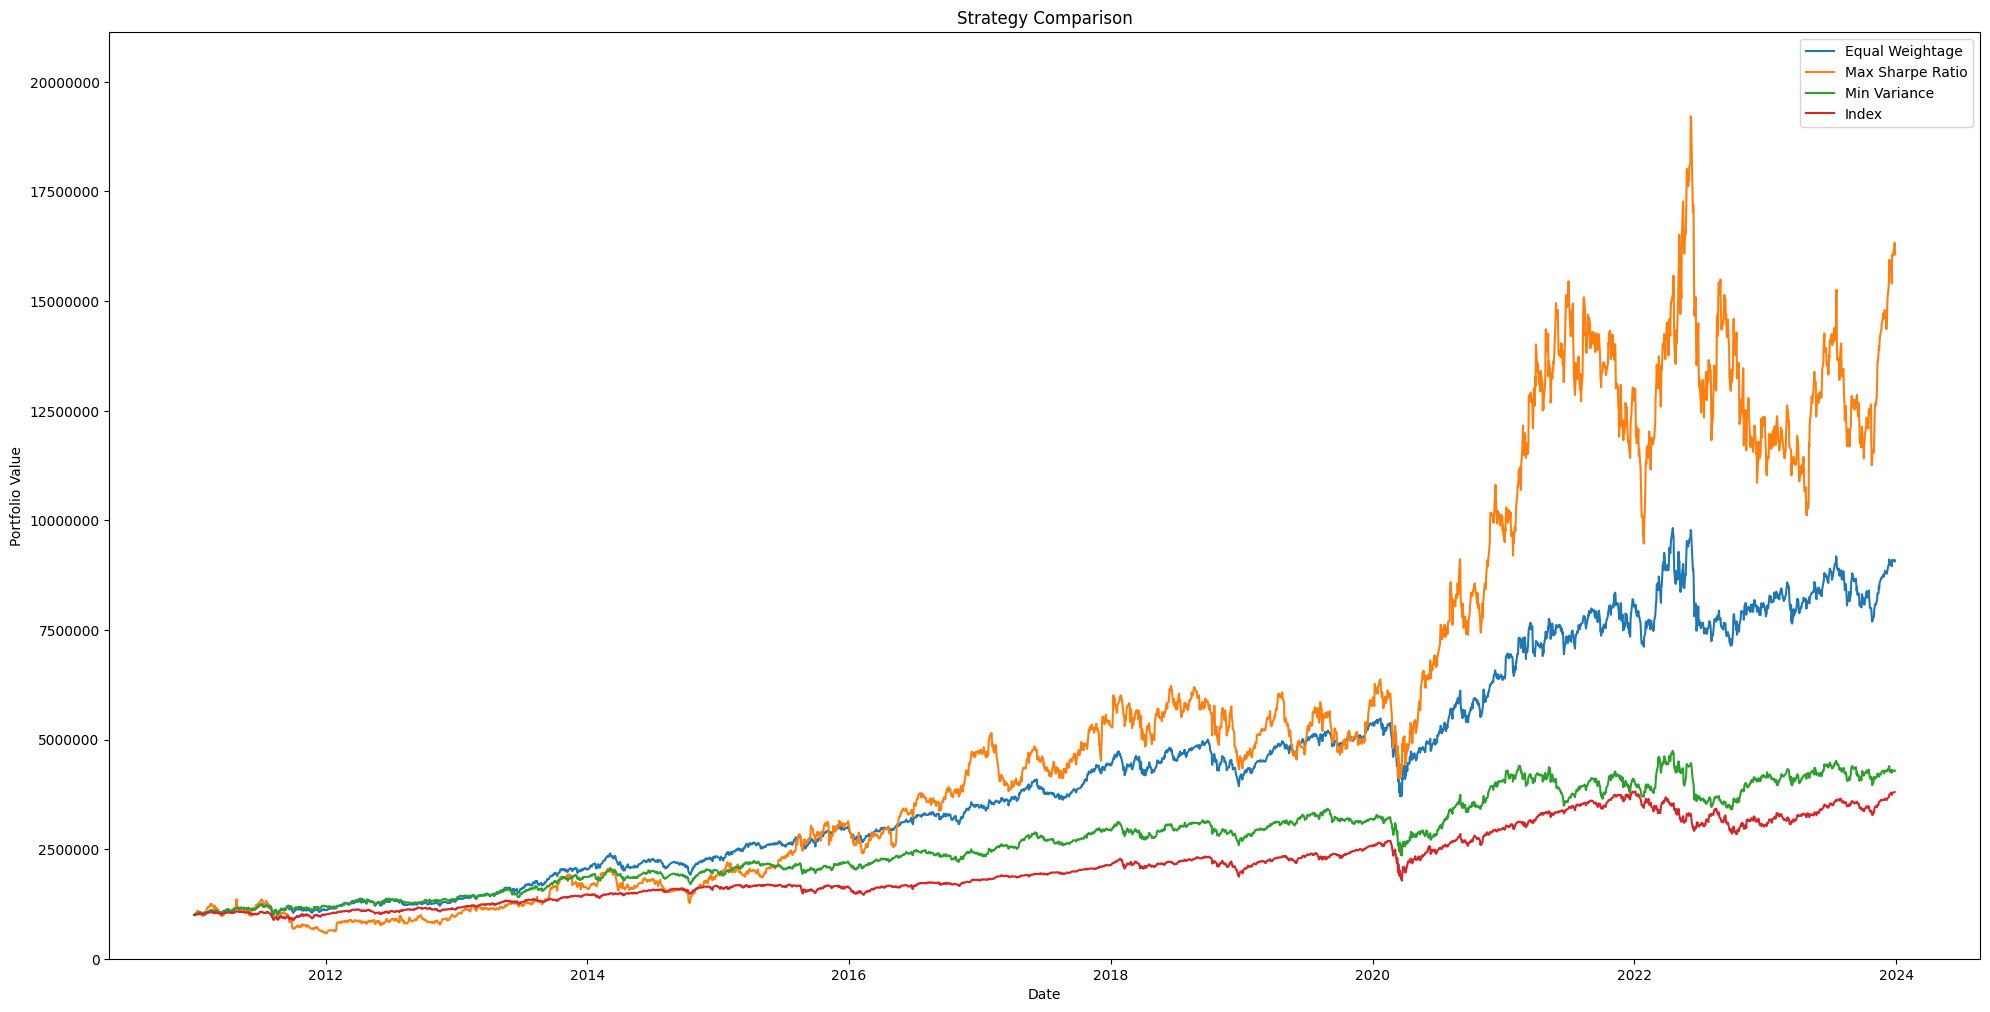

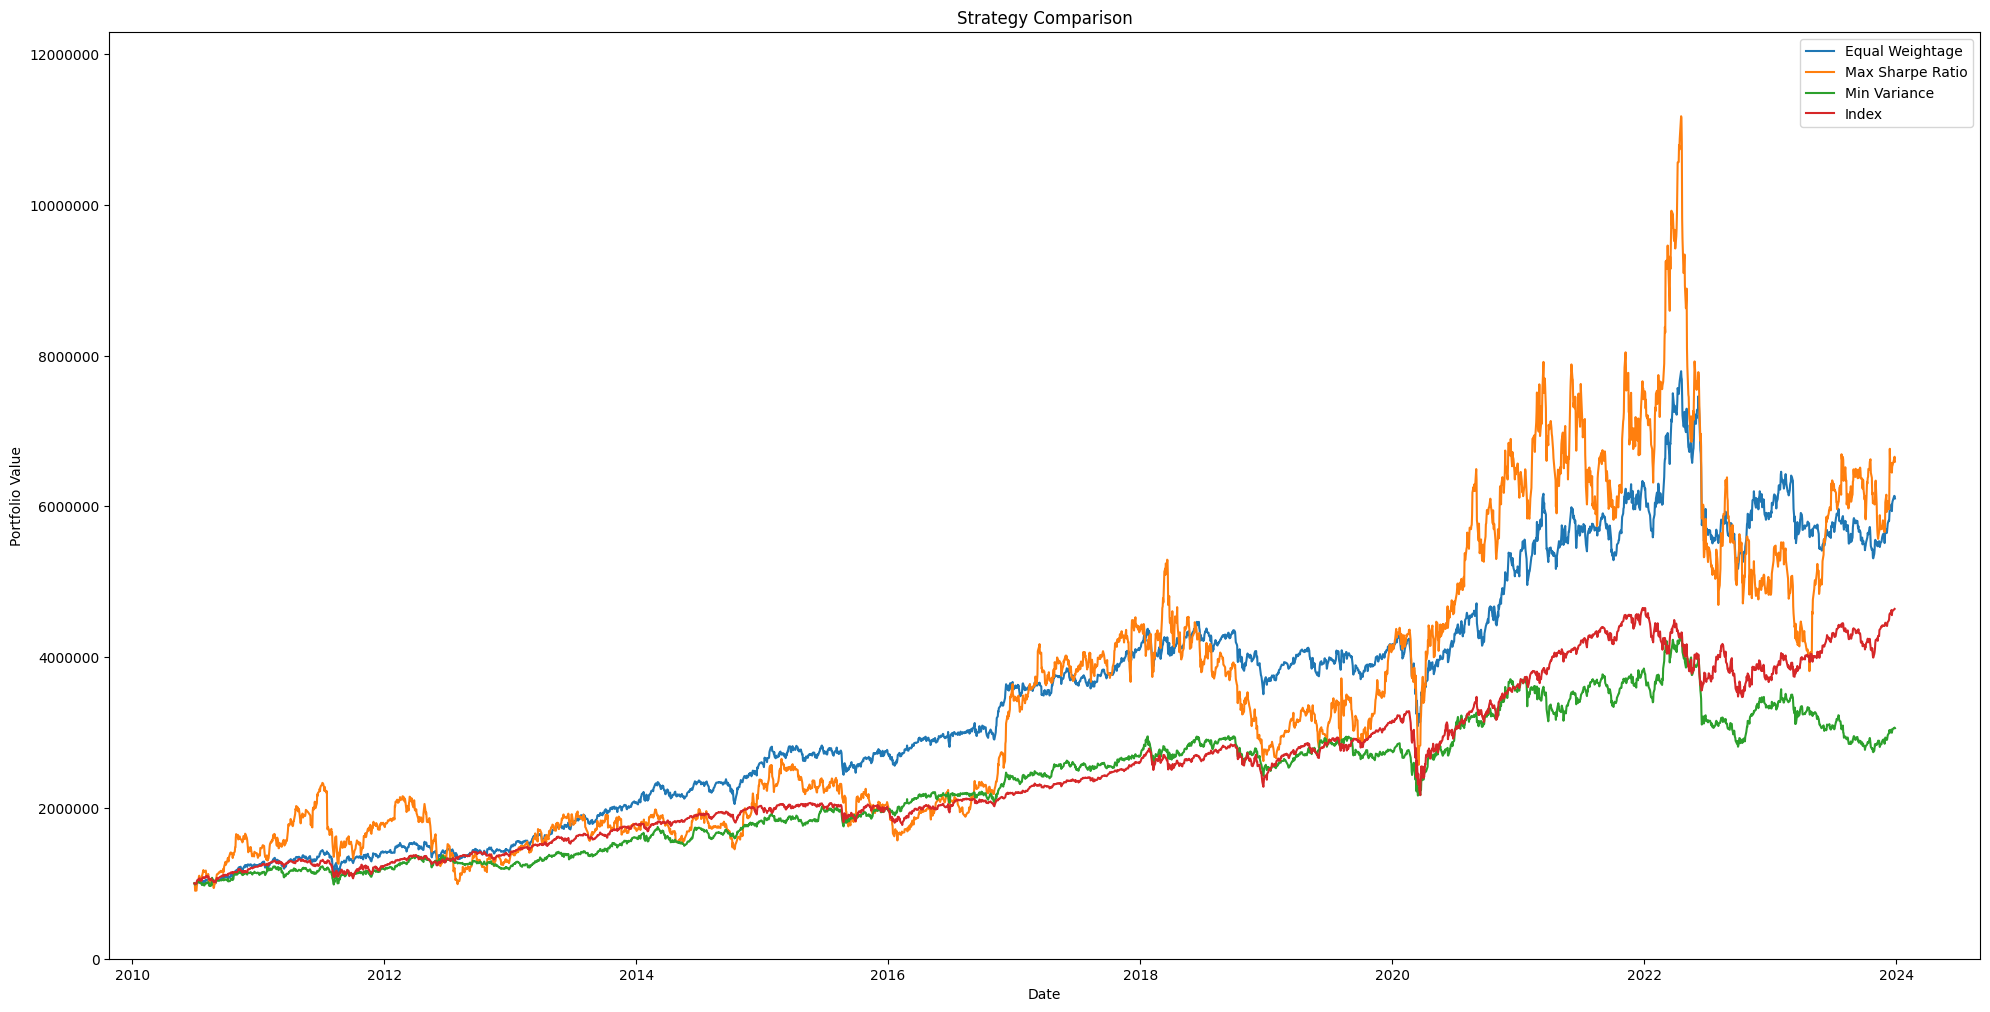

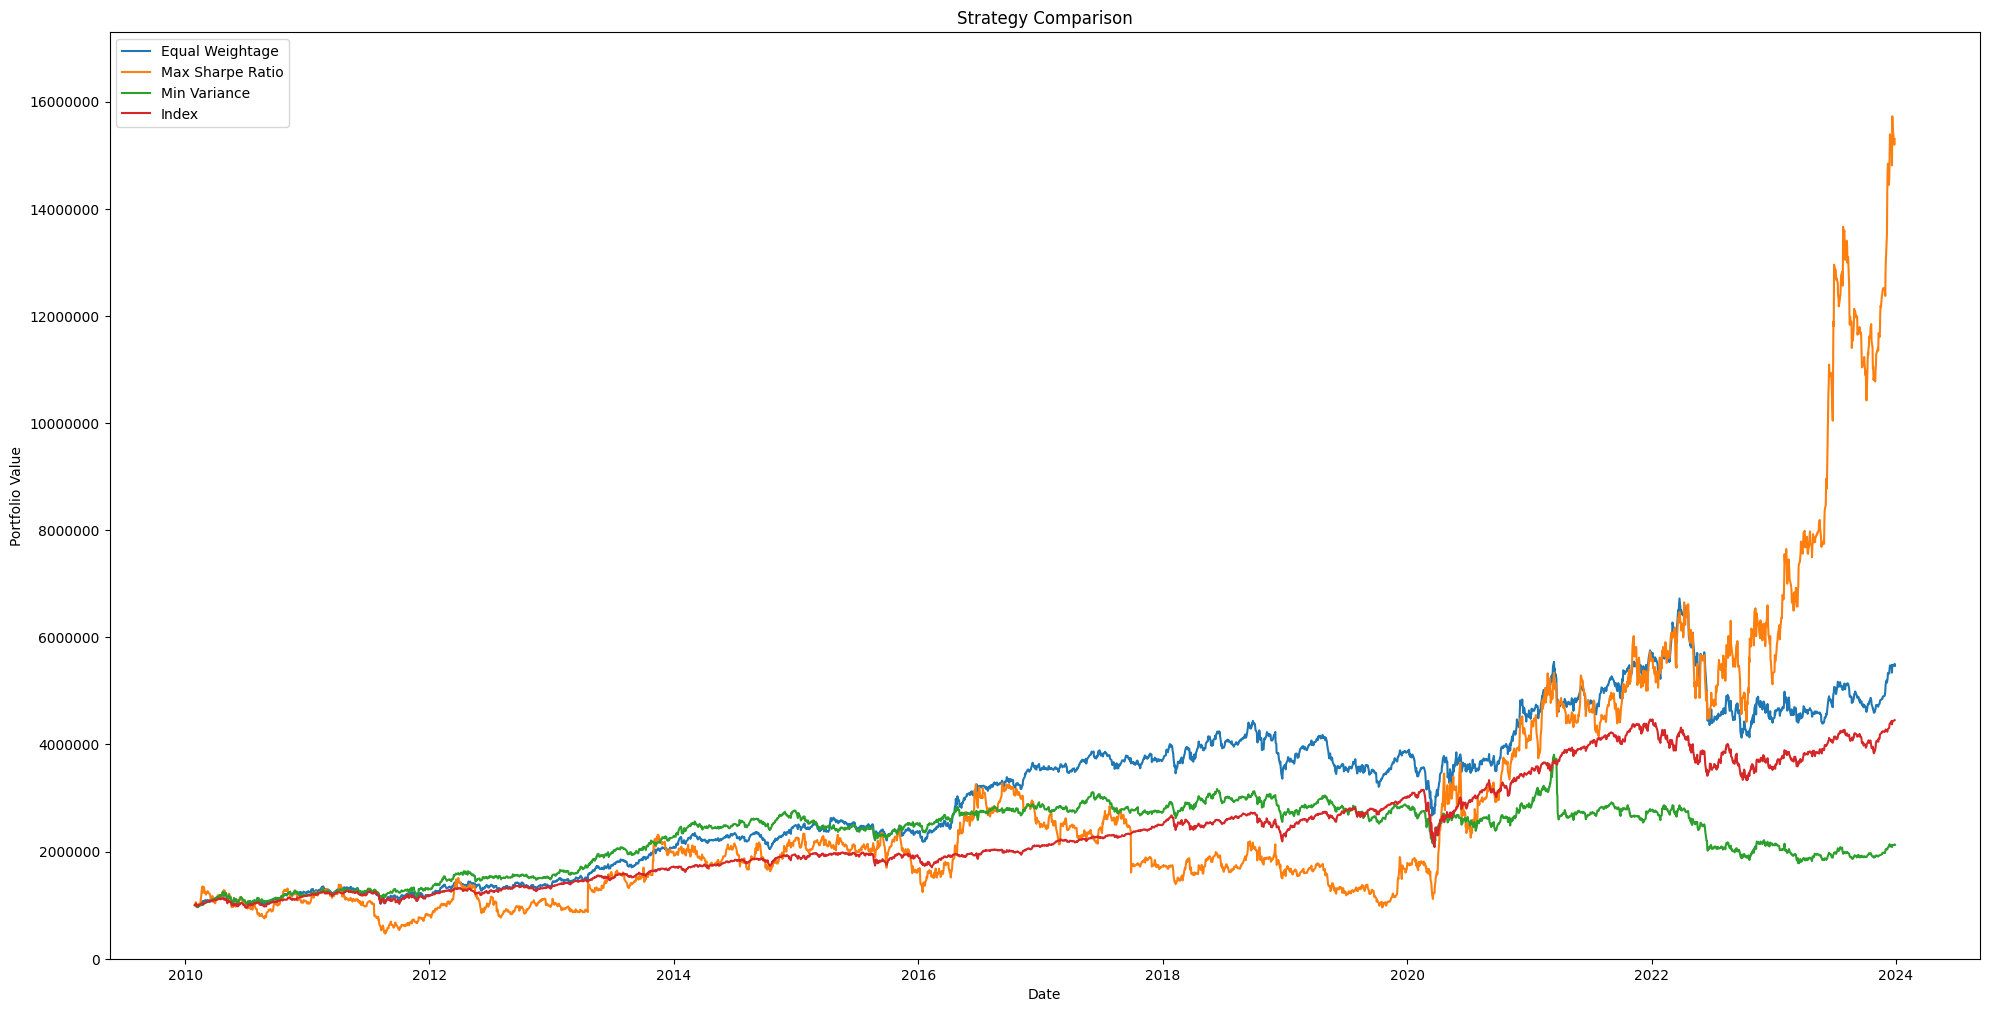

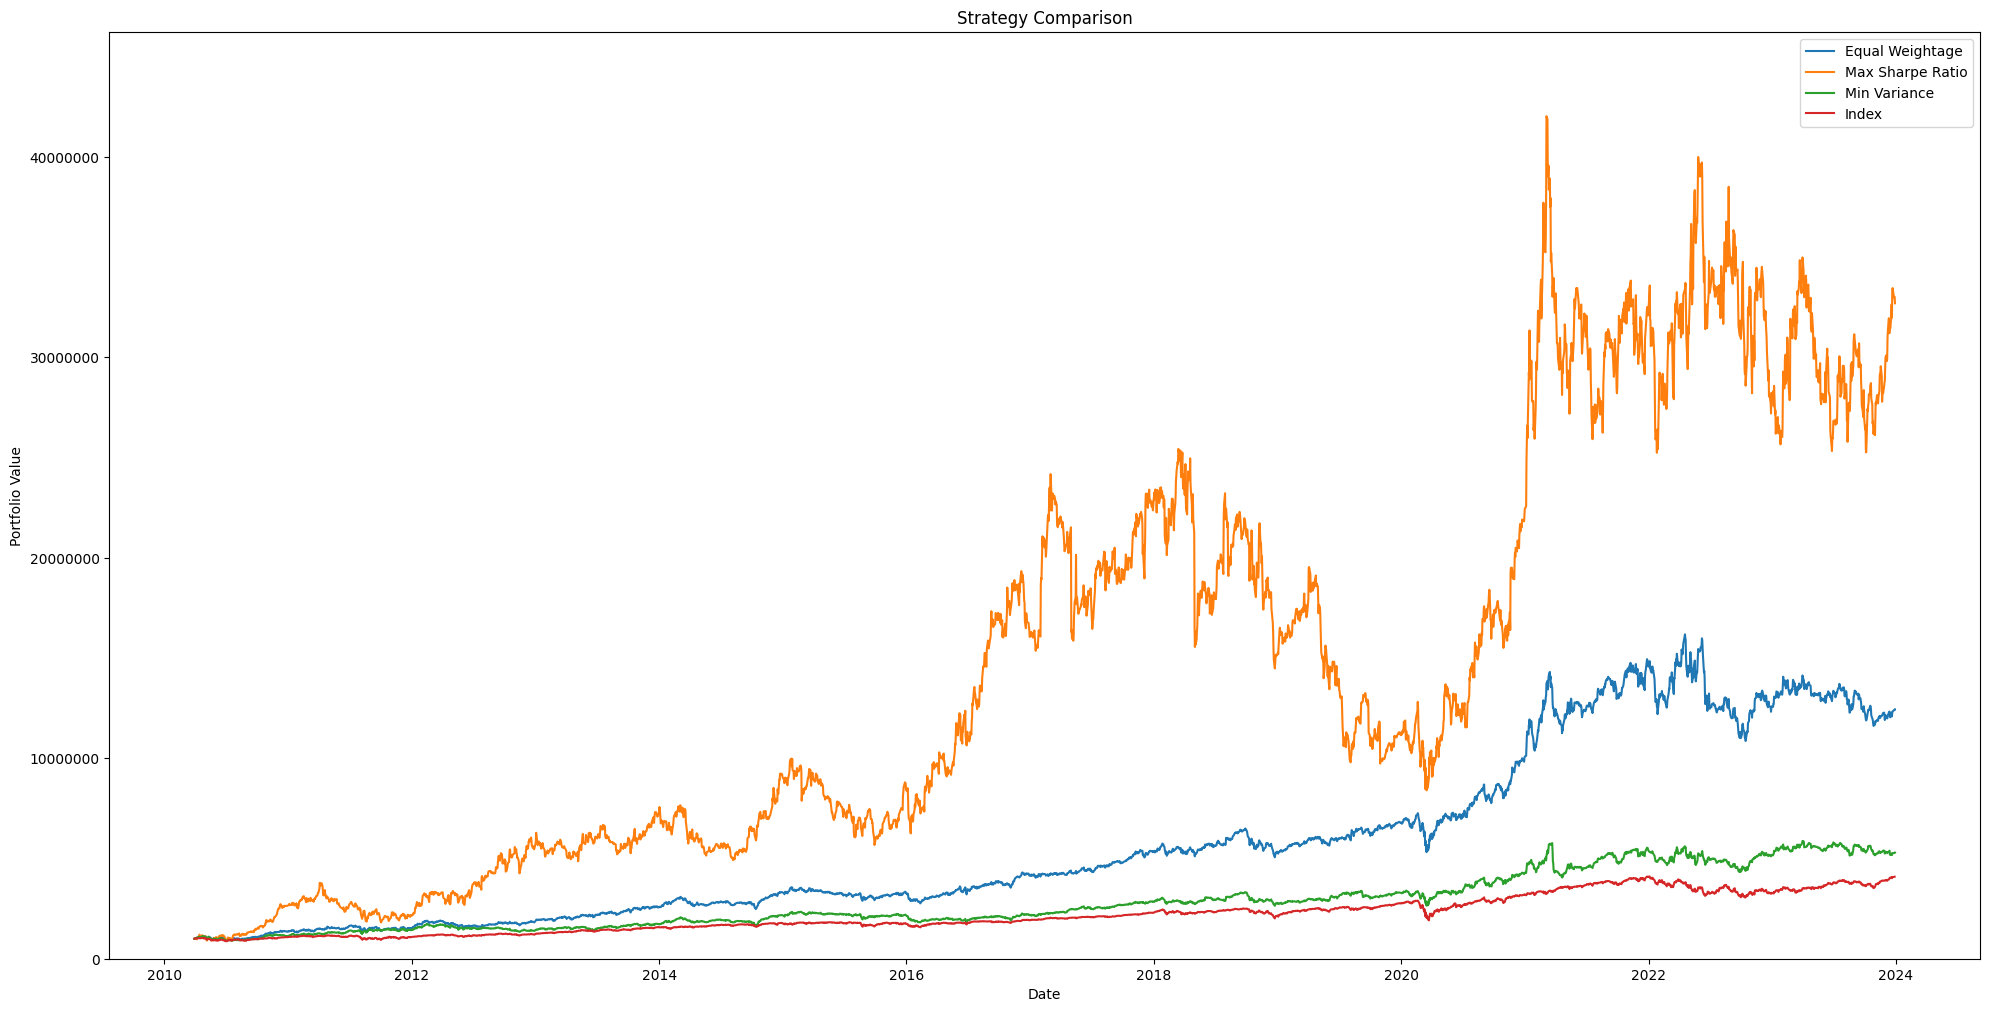

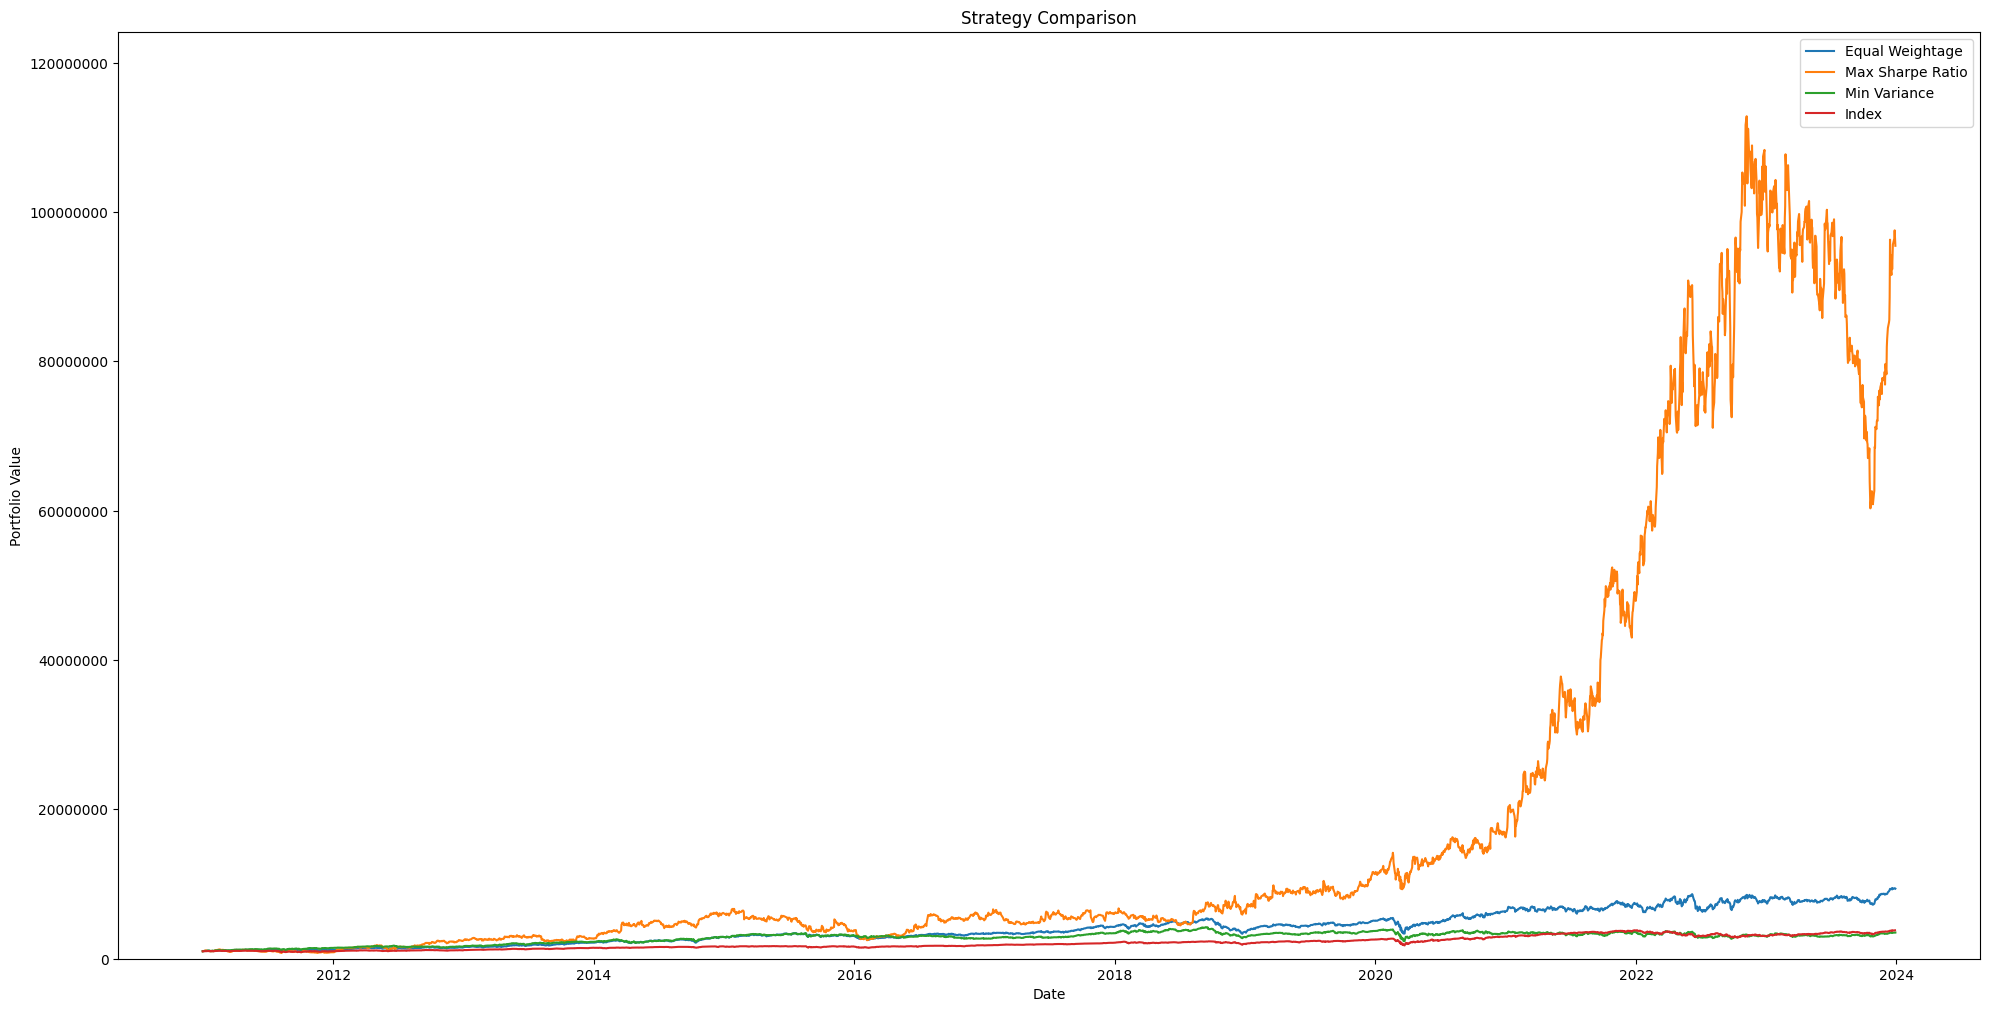

In [8]:
for an in monthly_rebalanced_analytics:
    an.plot_strategy_comparison()

In [9]:
for an in monthly_rebalanced_analytics:
    print(an.yearly_metrics())

(            equal_returns  max_sharpe_ratio  min_variance     index
2010-12-31            NaN               NaN           NaN       NaN
2011-12-31       0.106941         -0.418348      0.197863 -0.000032
2012-12-31       0.199690          0.682871      0.140758  0.134057
2013-12-31       0.544306          0.654910      0.366134  0.296012
2014-12-31       0.128138          0.198630      0.058595  0.113906
2015-12-31       0.276901          0.601989      0.102573 -0.007266
2016-12-31       0.165440          0.501681      0.086928  0.095350
2017-12-31       0.281445          0.139119      0.237495  0.194200
2018-12-31      -0.046094         -0.142115     -0.058820 -0.062373
2019-12-31       0.269239          0.270981      0.154477  0.288781
2020-12-31       0.199936          0.666297      0.283609  0.162589
2021-12-31       0.258044          0.316080     -0.003823  0.268927
2022-12-31      -0.004486         -0.028842      0.021543 -0.194428
2023-12-31       0.129251          0.300141    

In [10]:
for i,an in enumerate(quarterly_rebalanced_analytics):
    print(filter_paths[quarterly_filter_ids[i]])
    print(an.get_financial_metrics())

filters/annual_3_tier_filter.txt
                   Equal Weightage  Max Sharpe Ratio  Min Variance     Index
Max Drawdown              0.353408          0.600044      0.458745  0.339250
Sharpe Ratio              0.504188          0.228396      0.522654  0.559755
Sortino Ratio             0.653093          0.311930      0.681291  0.678474
Calmar Ratio              0.403045          0.211551      0.290958  0.343314
Annualized Return         0.142439          0.126940      0.133475  0.116469
Volatility                0.242845          0.468221      0.217114  0.172342
VaR                       0.759915          0.528644      0.787699  0.837536
CVaR                      0.691861          0.438231      0.724107  0.778767
filters/biannual_2_tier_filter.txt
                   Equal Weightage  Max Sharpe Ratio  Min Variance     Index
Max Drawdown              0.334289          0.705589      0.337327  0.339250
Sharpe Ratio              0.657888         -0.123094      0.872442  0.502521
Sortino 

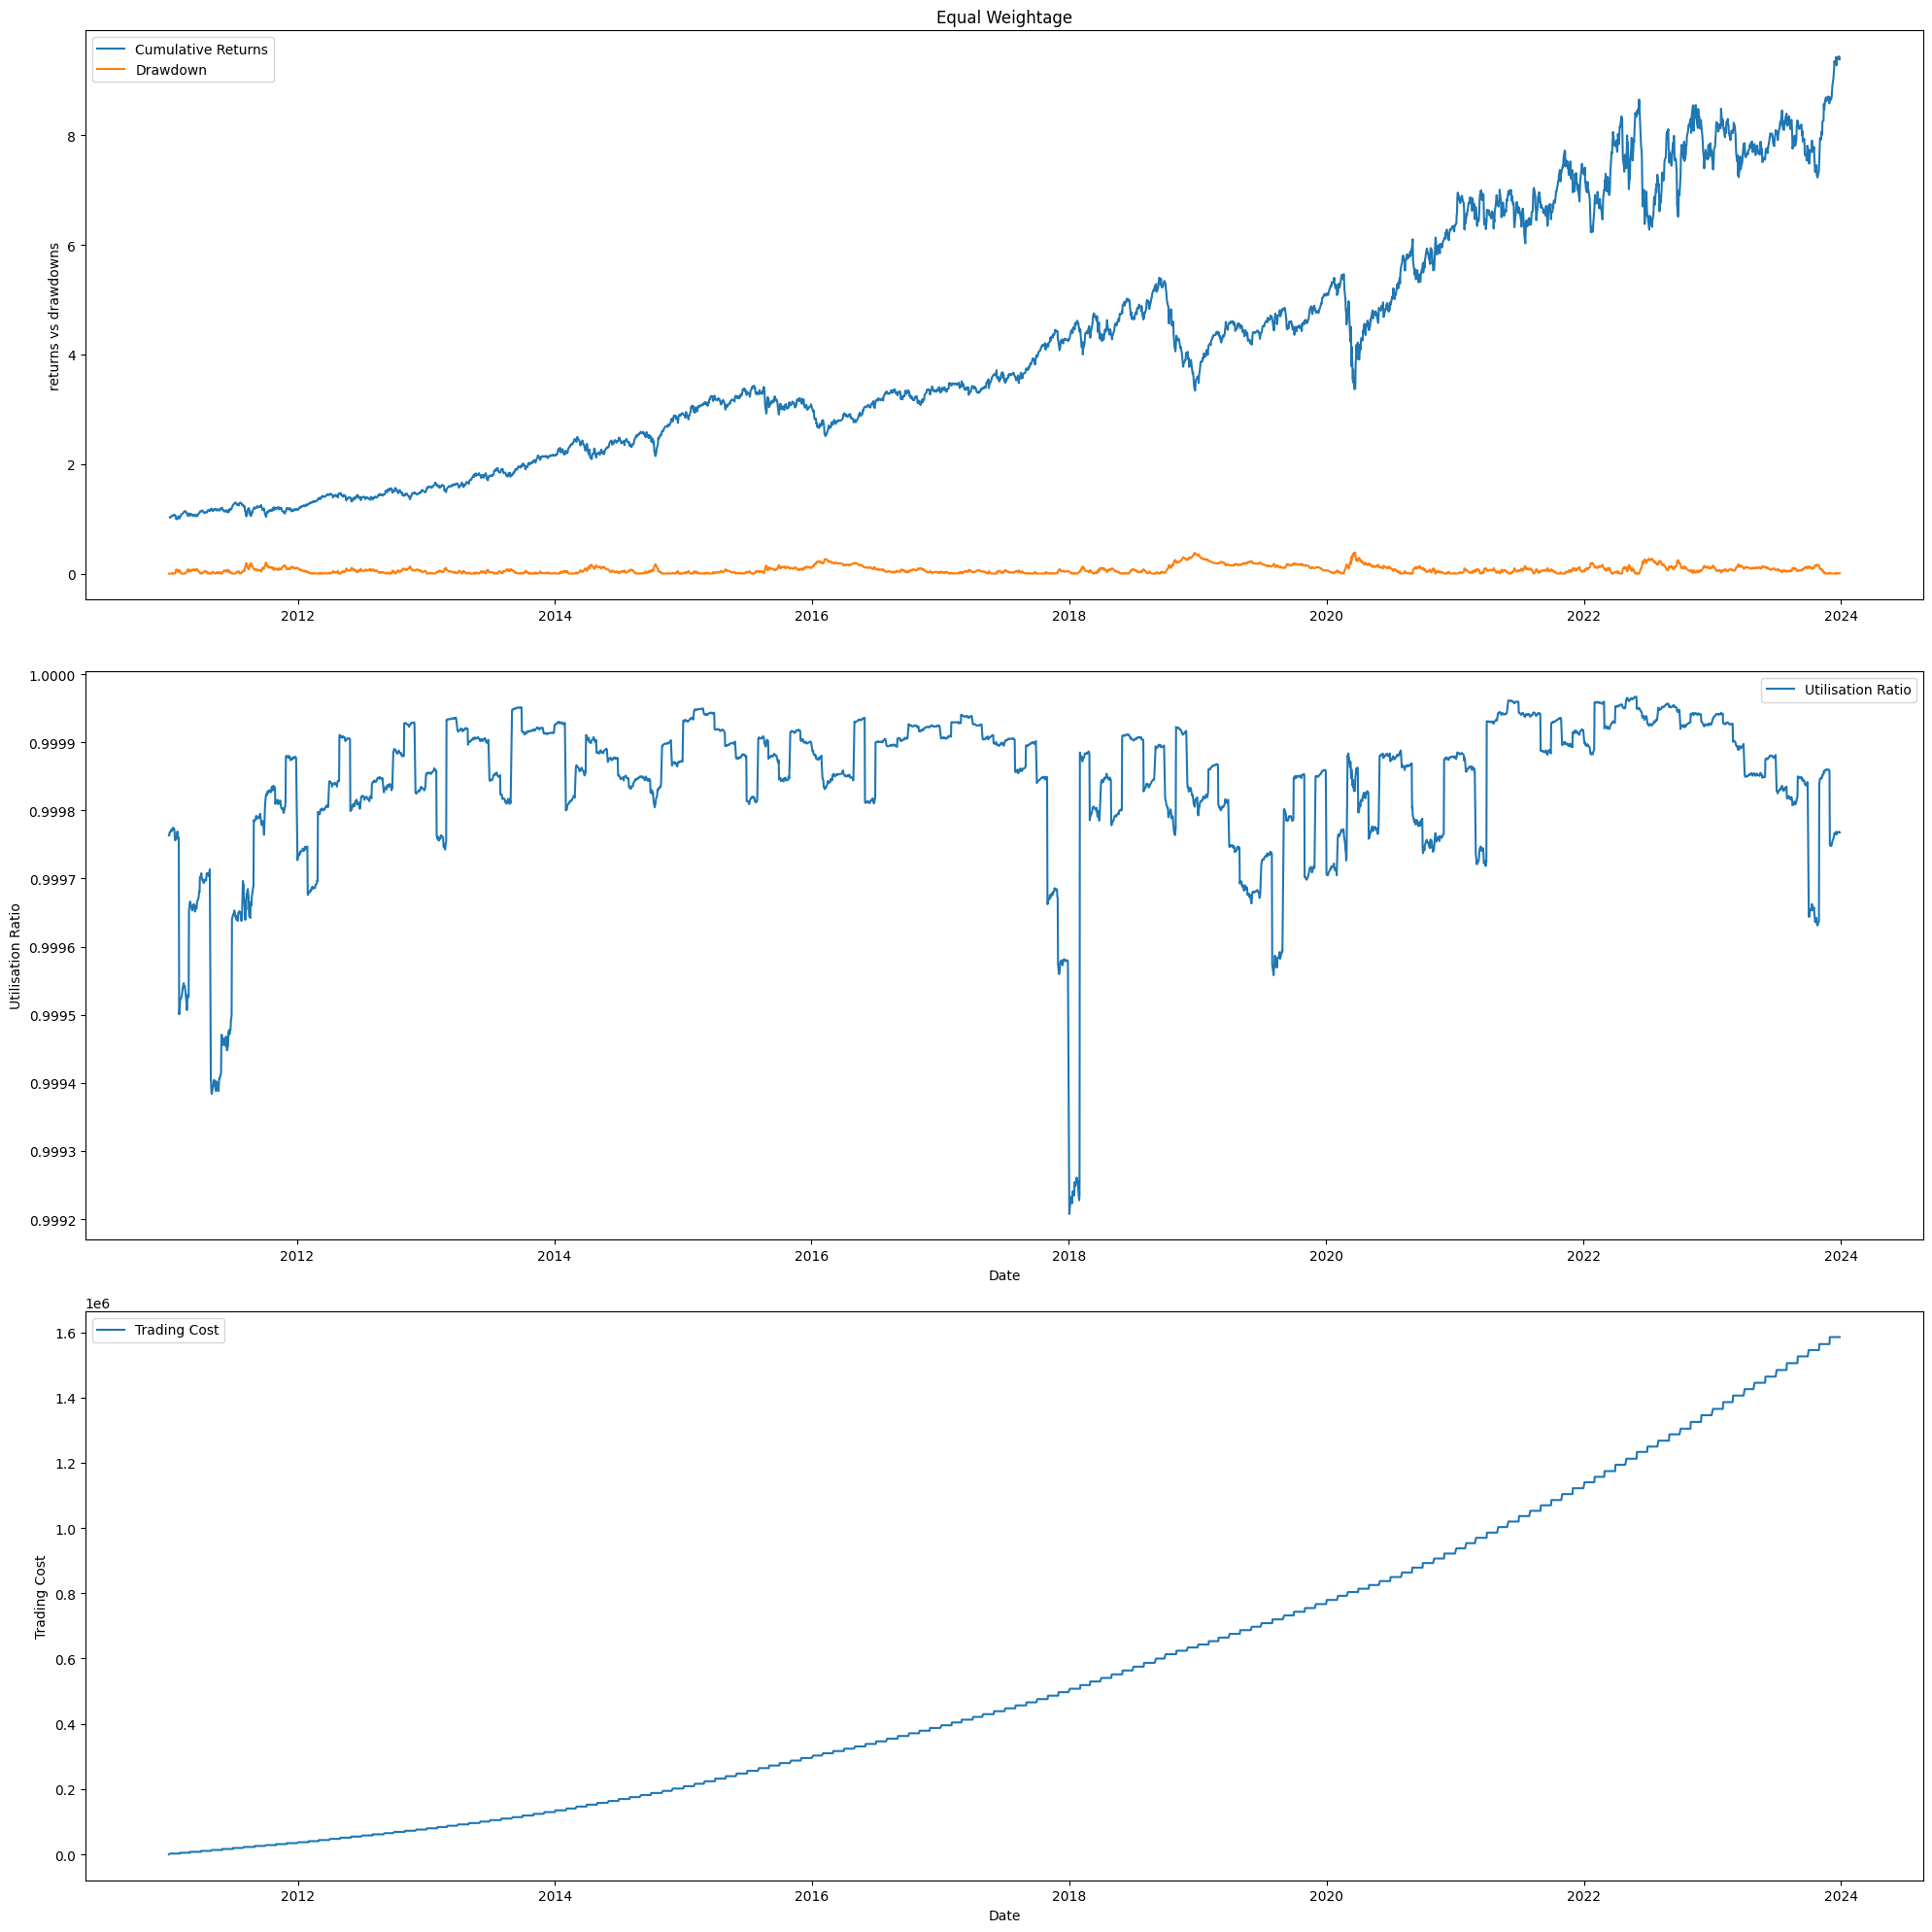

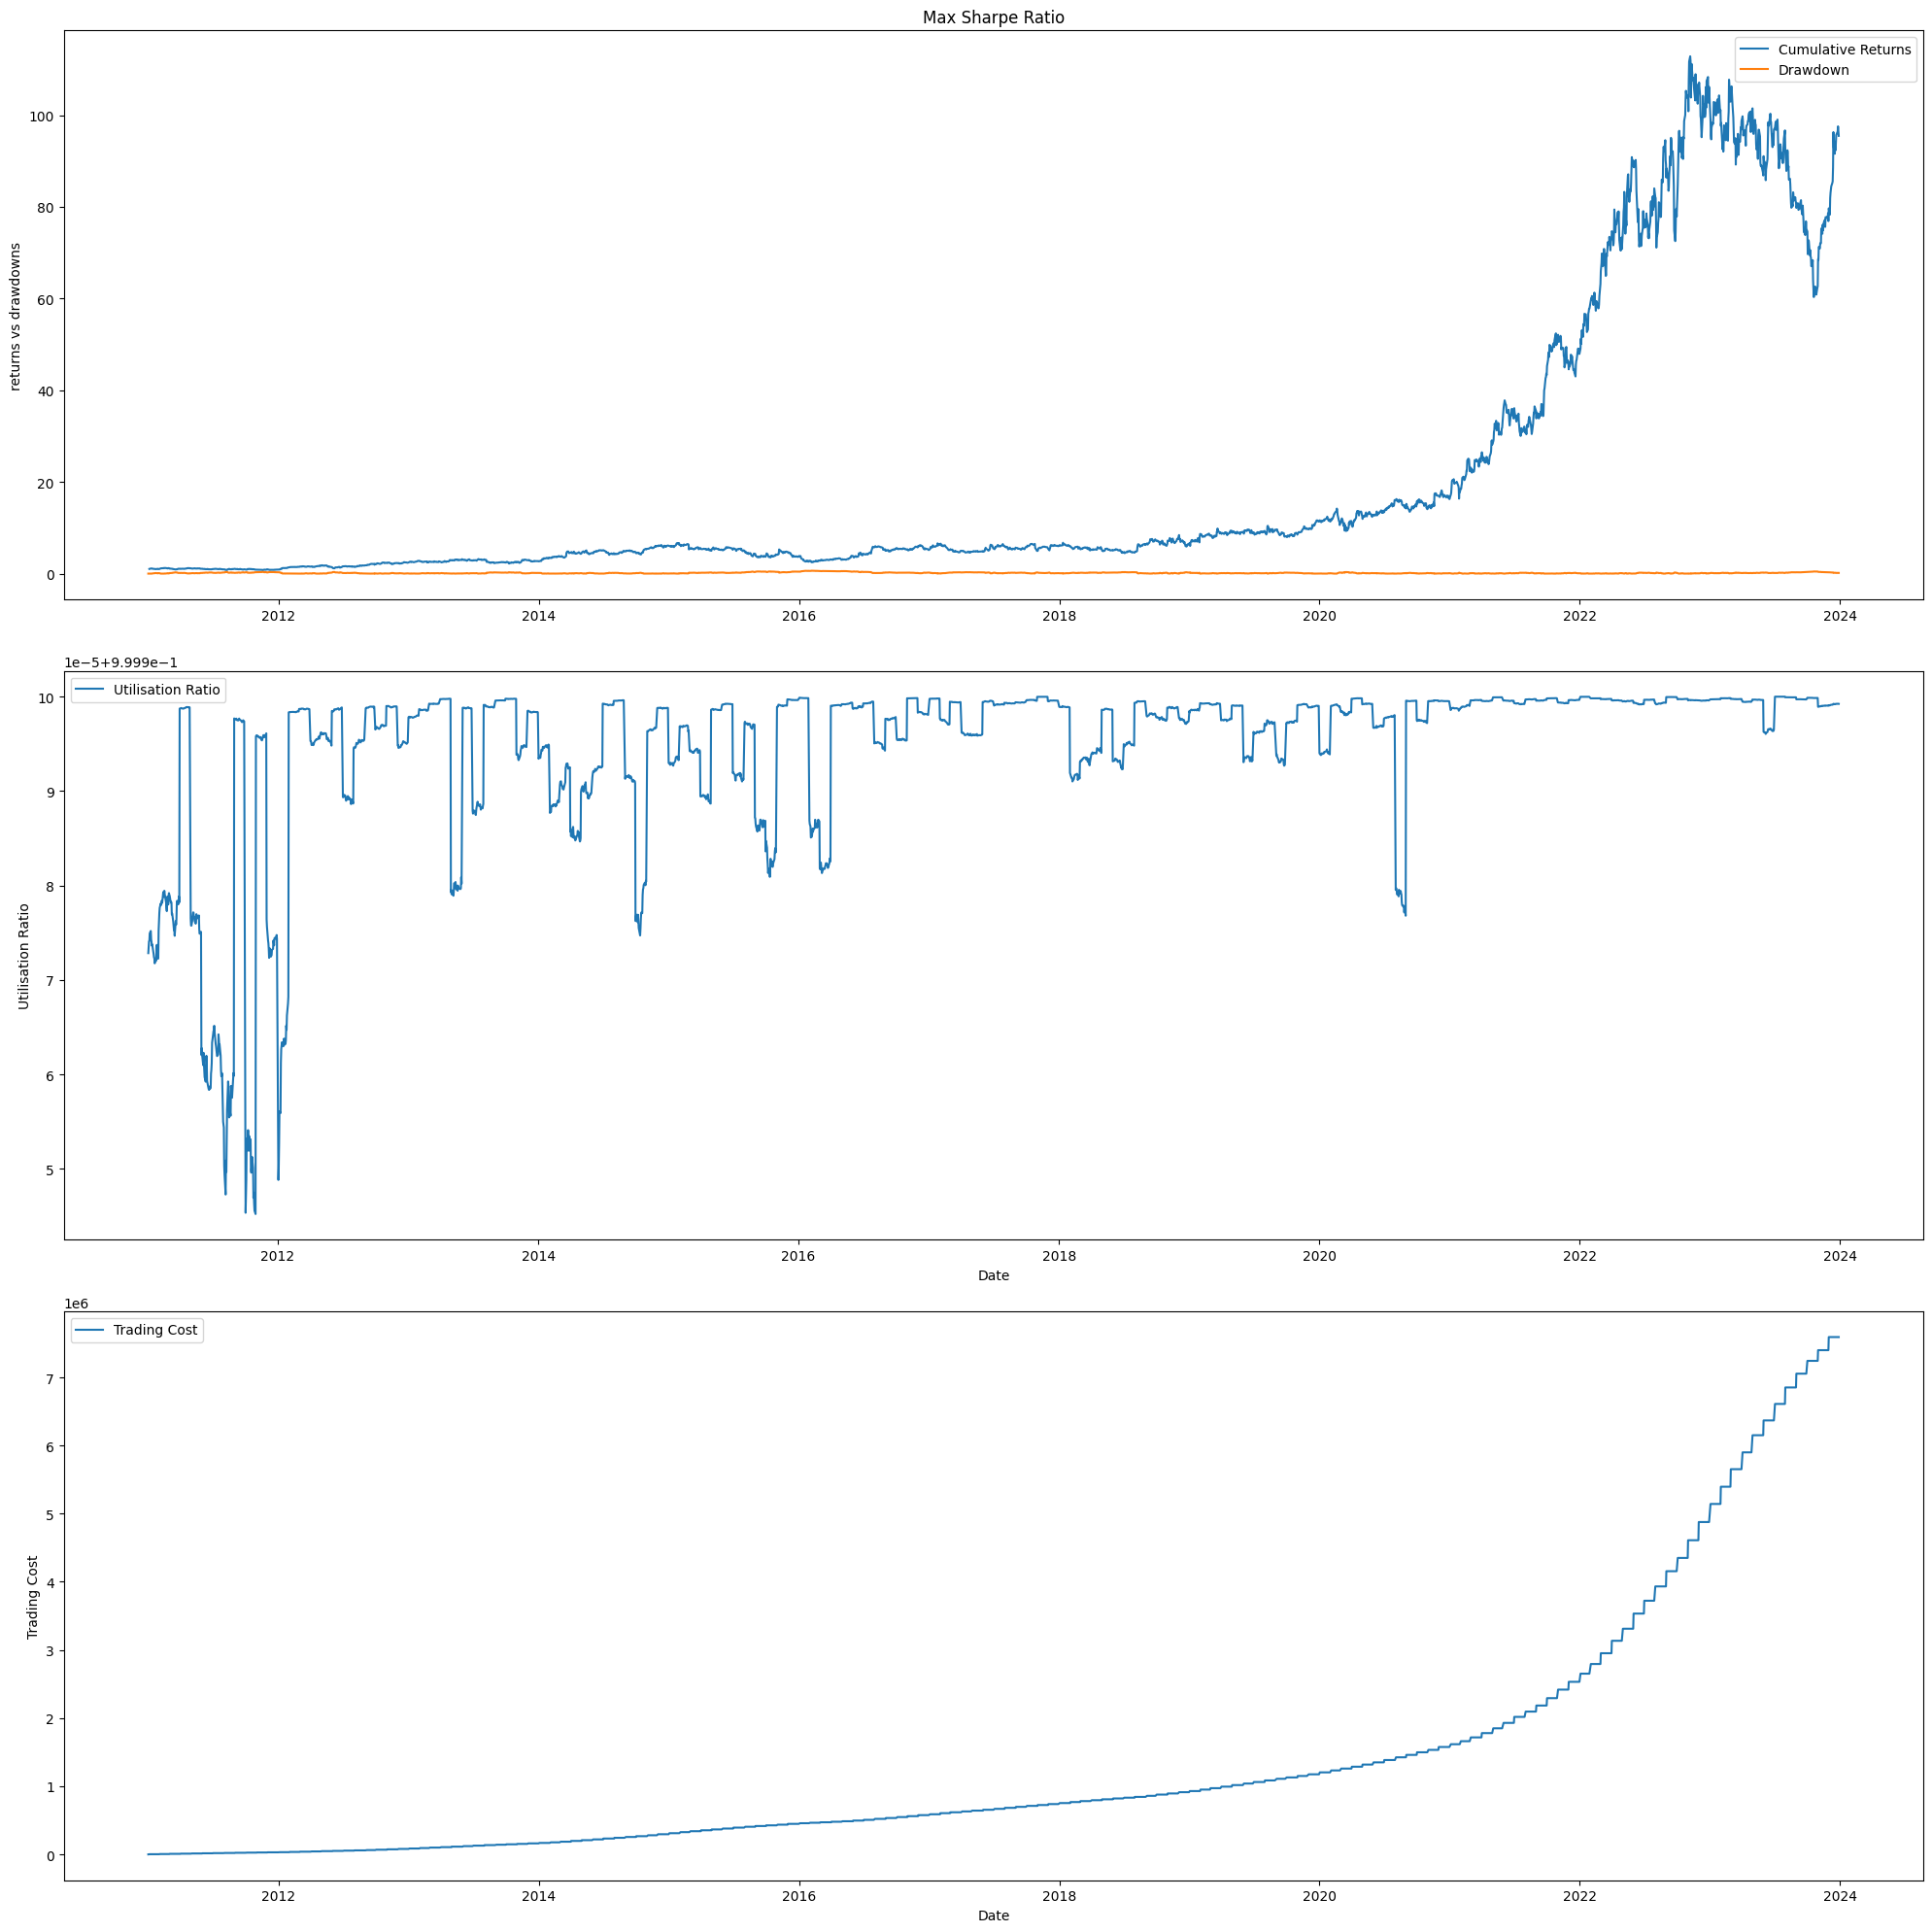

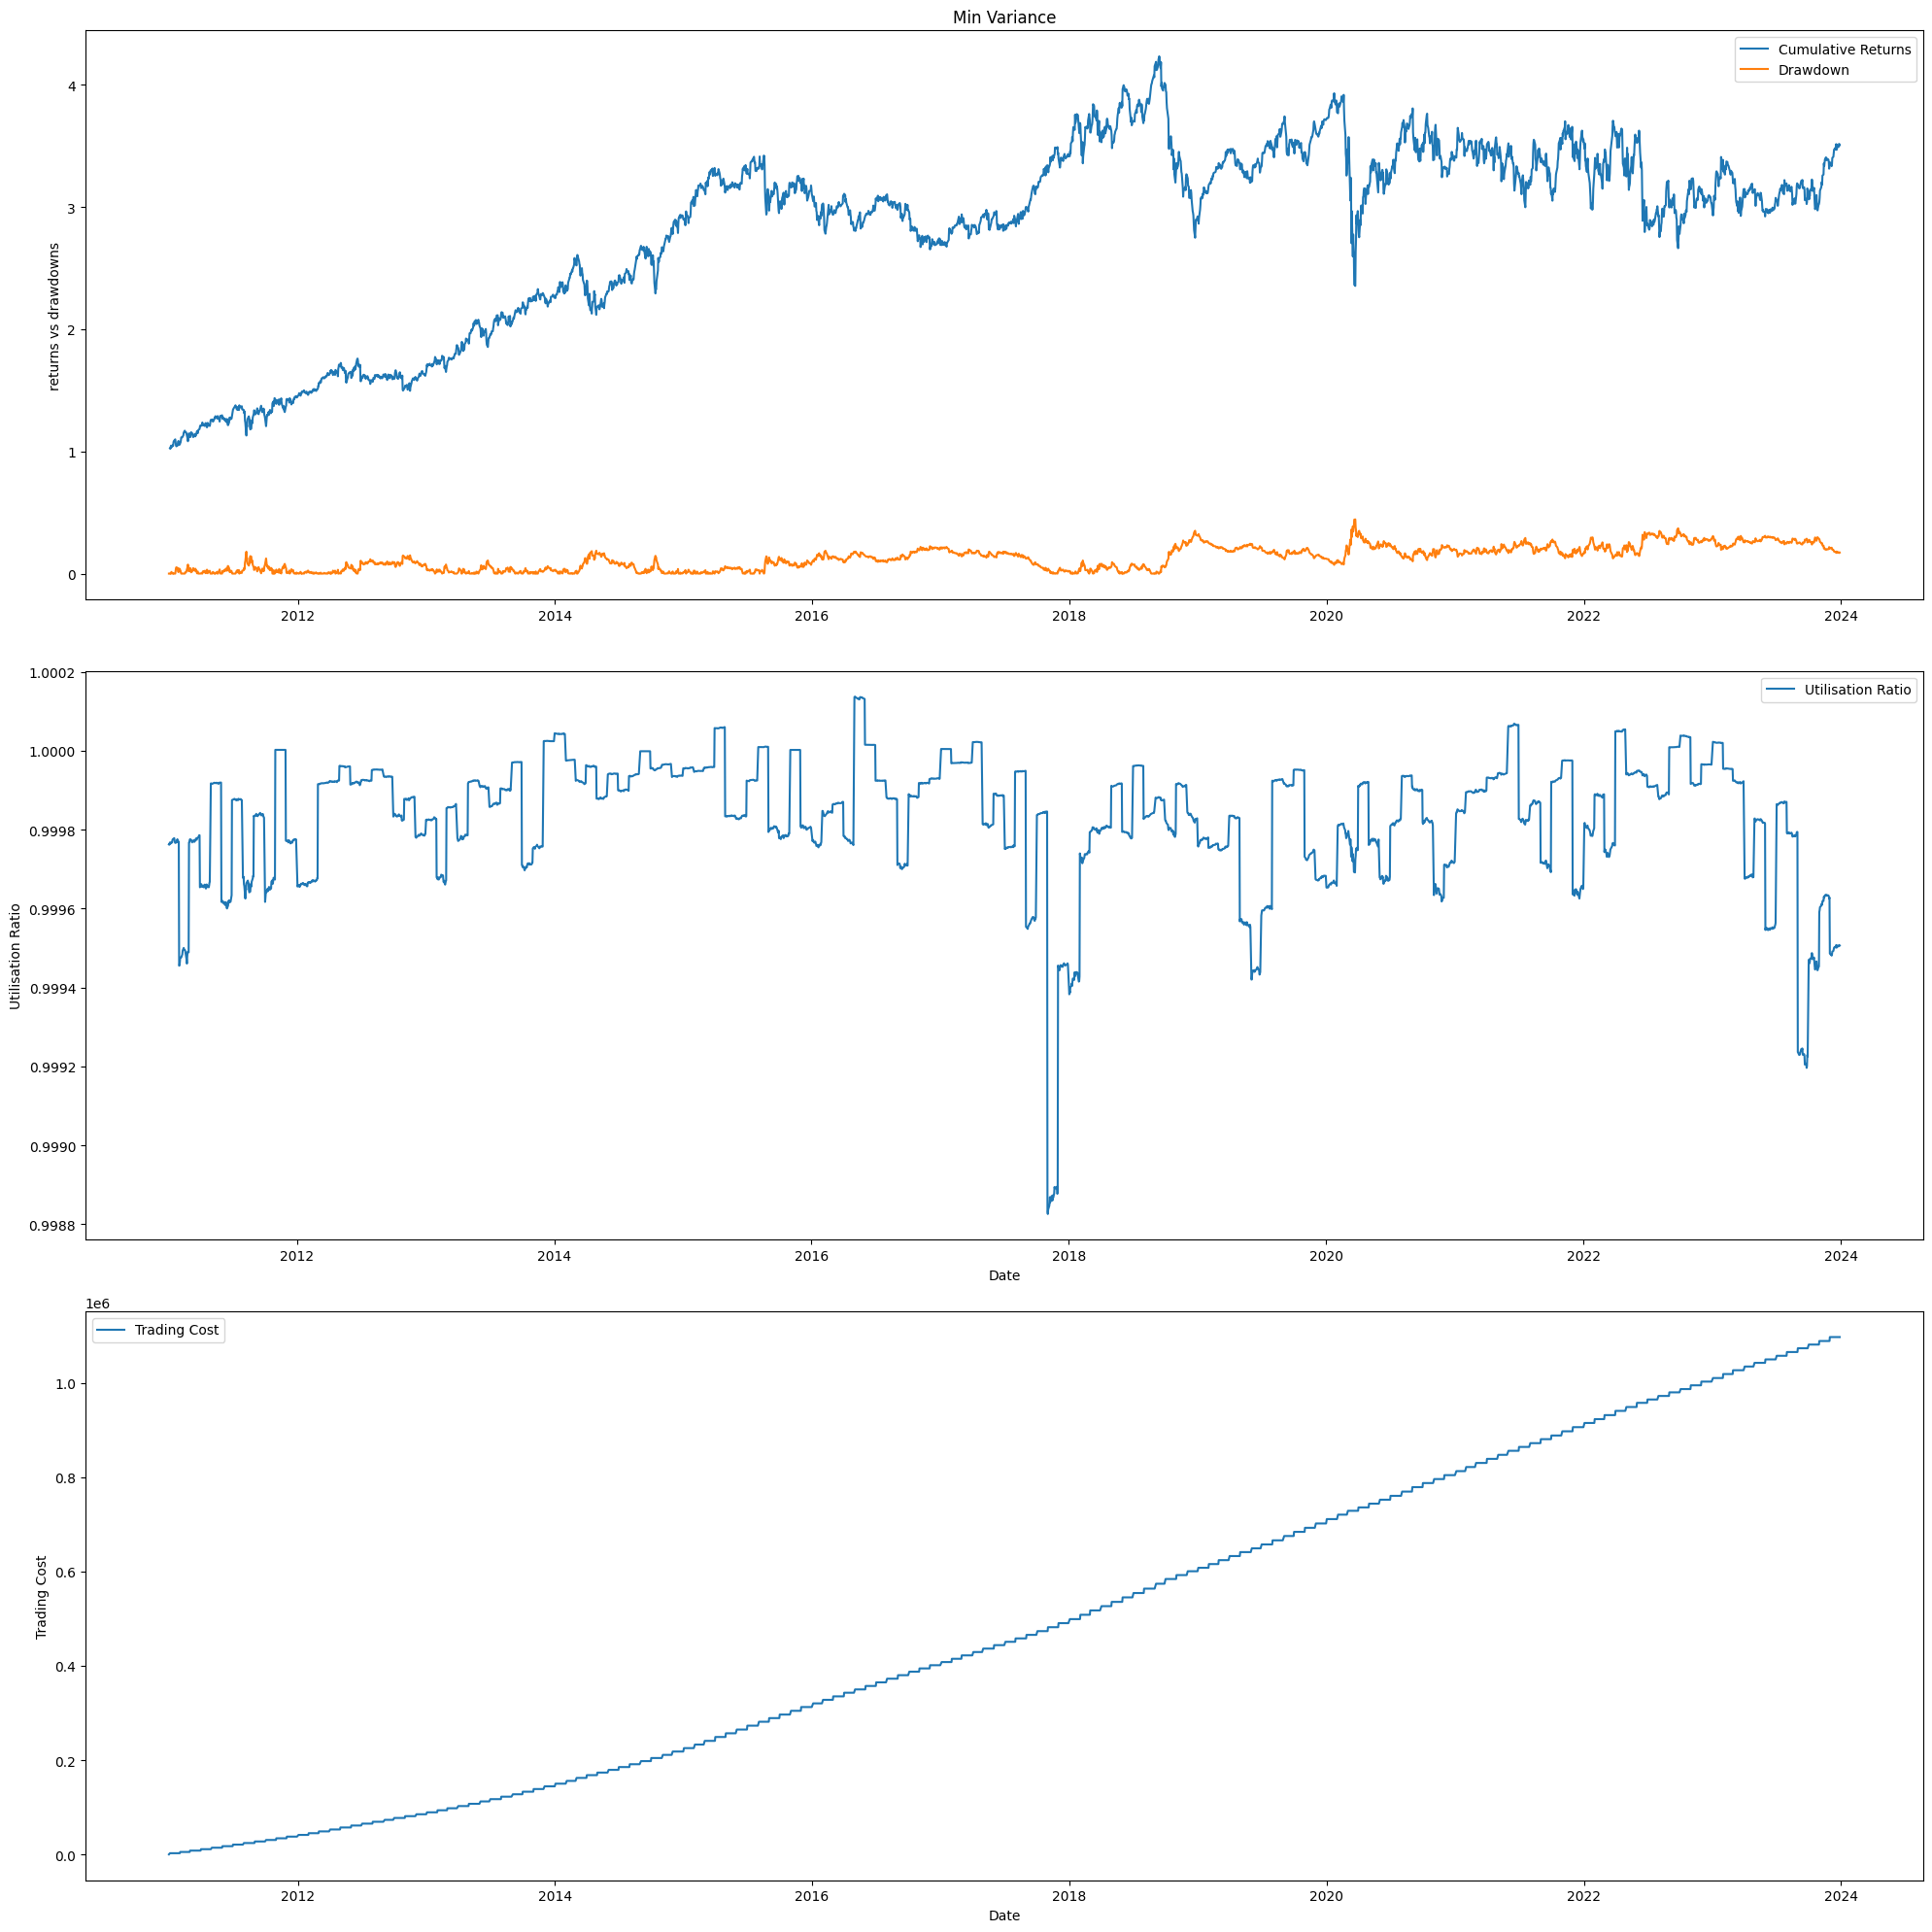

In [12]:
an_test = monthly_rebalanced_analytics[-1]
an_test.plot_all_individual_graphs()